# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,1736.0,4<=X<7,female div/dep/mar,4.0,real estate,31.0,own,1.0,unskilled resident,1.0,none,yes,good
499,<0,30.0,existing paid,3857.0,1<=X<4,male div/sep,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
500,no checking,12.0,existing paid,804.0,>=7,male single,4.0,car,38.0,own,1.0,skilled,1.0,none,yes,good
501,<0,45.0,existing paid,1845.0,1<=X<4,male single,4.0,no known property,23.0,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

1. В какой шкале представлены все признаки в наборе?
Ответ: 
checking_status (заработок в год) - порядковая (можно Сравнивать,Упорядочивать)
duration (срок выплата кредита в мес) - абсолютная
credit_history - номинальная
credit_amount (размер кредита) - абсолютная
employment (рабочий стаж) - порядковая
personal_status - номинальная
residence_since (время проживания по текущему адресу, год) - абсолютная
property_magnitude (причина взятия кредита) - номинальная
age - абсолютная
housing (наличие собственного жилья) - номинальная
existing_credits (всего кредитов) - абсолютная
job (квалификация) - порядковая
num_dependents (люди, зависящие от кредитора) - порядковая
own_telephone (наличие собственного телефона) - номинальная
foreign_worker (иностранный работник: да/нет) - номинальная
class (принят/отторгнут) - номинальная

2. Укажите признак с наименьшей дисперсией.

In [5]:
credit_df.var()


duration            1.436e+02
credit_amount       8.085e+06
residence_since     1.325e+00
age                 1.271e+02
existing_credits    3.439e-01
num_dependents      1.396e-01
dtype: float64

Ответ: минимальная дисперсия у num_dependents

3. Среднее какого признака отличается для двух классов сильнее всего?

In [6]:
credit_df.loc[credit_df['class'] == 'good'].mean() #среднее для класса good, loc - Доступ к группе строк и столбцов по метке(ам) или логическому массиву.

duration              19.973
credit_amount       3077.320
residence_since        2.781
age                   36.621
existing_credits       1.453
num_dependents         1.175
dtype: float64

In [7]:
credit_df.loc[credit_df['class'] == 'bad'].mean() #среднее для класса bad

duration              24.524
credit_amount       3565.748
residence_since        2.901
age                   33.317
existing_credits       1.354
num_dependents         1.152
dtype: float64

<AxesSubplot:>

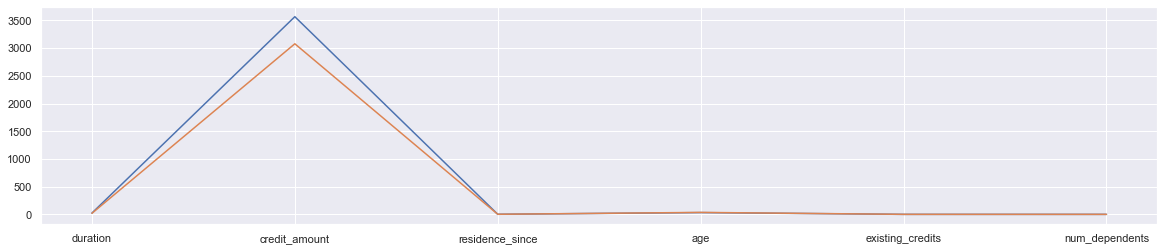

In [8]:
(credit_df.loc[credit_df['class'] == 'bad'].mean()).plot(layout=(1, 2),figsize=(20, 4), sharex=False)
(credit_df.loc[credit_df['class'] == 'good'].mean()).plot(layout=(1, 2), figsize=(20, 4), sharex=False)

4. В каком классе больше всего skilled работников?

In [9]:
print("Skilled in class Bad: ", (credit_df.loc[credit_df['class'] == 'bad']['job'] =="skilled").value_counts()[1])

Skilled in class Bad:  107


In [10]:
print("Skilled in class Good: ", (credit_df.loc[credit_df['class'] == 'good']['job'] =="skilled").value_counts()[1])

Skilled in class Good:  213


5. Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:>

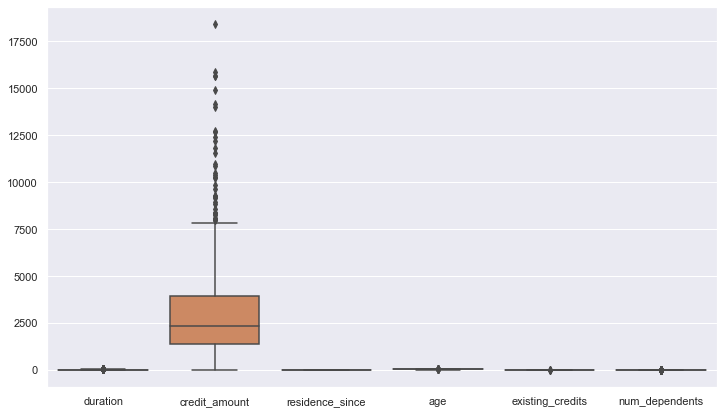

In [11]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

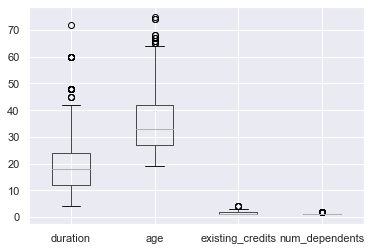

In [12]:
boxplot = credit_df.boxplot(column = ['duration','age', 'existing_credits', 'num_dependents'])

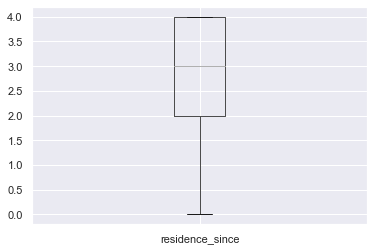

In [13]:
boxplot = credit_df.boxplot(column = ['residence_since'])

6. Сколько пропущенных значений в наборе?

In [14]:
credit_df.isnull()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
credit_amount          1
employment             0
personal_status        0
residence_since       17
property_magnitude     0
age                    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

7. Попытайтесь заполнить пропущенные значения.

In [16]:
have_Nan_columns = list (set(credit_df.columns) -  set(['checking_status','duration','credit_history', 'employment',
                                                       'personal_status', 'property_magnitude', 'age', 'housing', 'existing_credits',
                                                       'job', 'own_telephone', 'foreign_worker','num_dependents','class']))
have_Nan_columns

['residence_since', 'credit_amount']

In [17]:
credit_df[have_Nan_columns].replace(np.NaN, '-1').isnull().sum()

residence_since    0
credit_amount      0
dtype: int64

8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

Абсолютная шкала: age

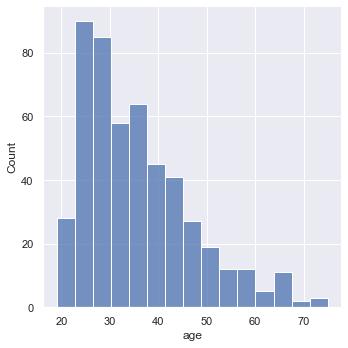

In [30]:
sns.displot(credit_df['age'], kde=False)

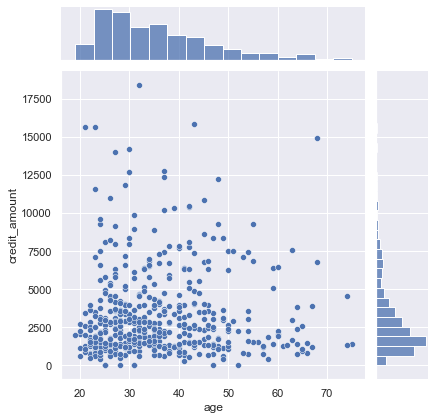

In [19]:
sns.jointplot(x='age', y='credit_amount', data=credit_df, kind='scatter')

<AxesSubplot:>

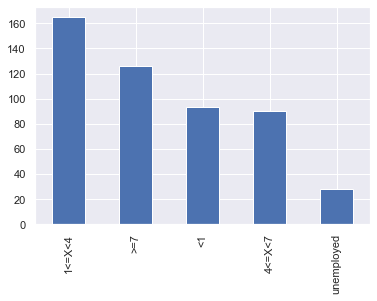

In [20]:
credit_df['employment'].value_counts().plot(kind='bar')


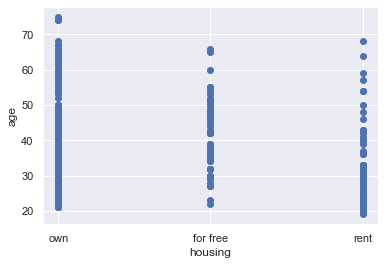

In [21]:
plt.plot(credit_df['housing'],credit_df['age'],'bo')
plt.xlabel('housing')
plt.ylabel('age')
plt.show()

9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

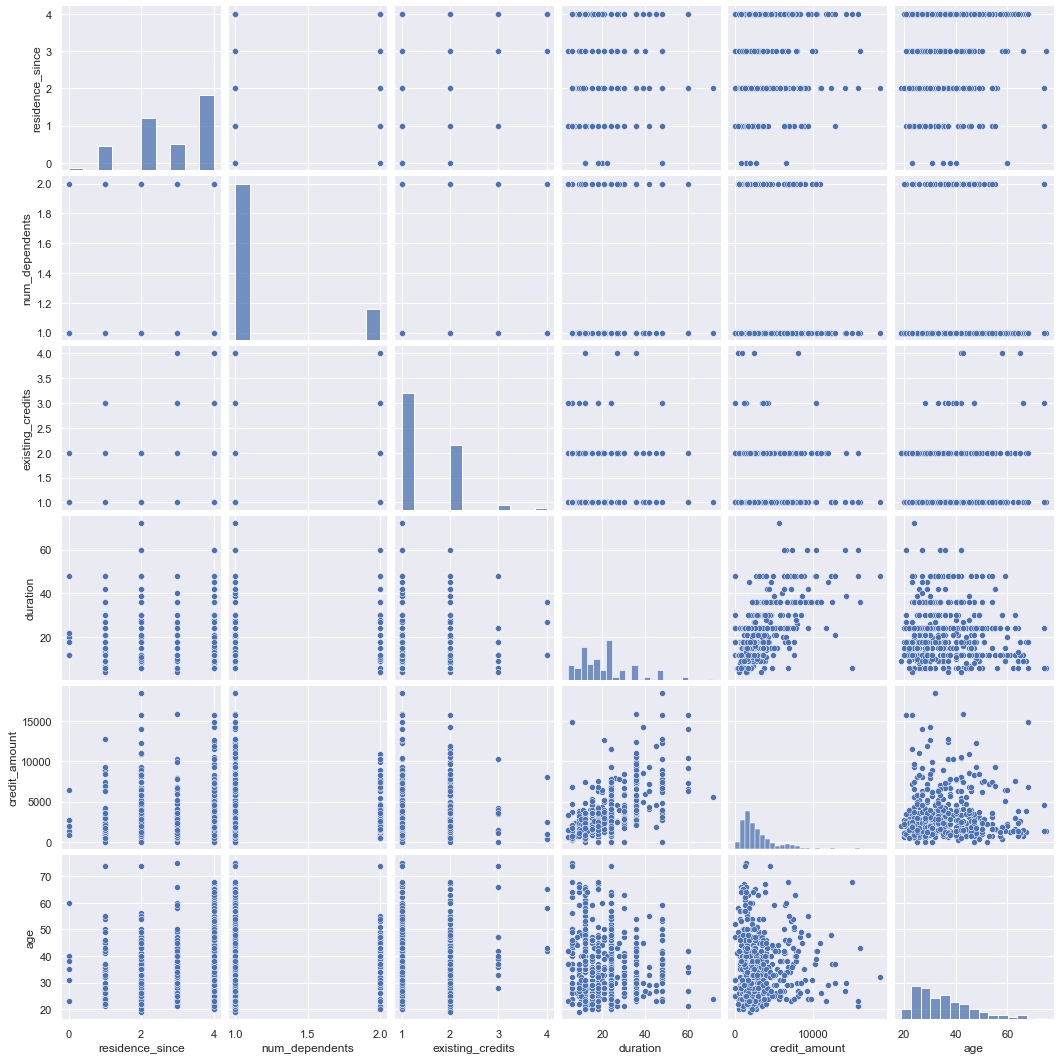

In [22]:
numerable_columns = list(set(credit_df.columns) -  set(['checking_status','credit_history','employment','personal_status',
                                                        'property_magnitude','housing','job','own_telephone','foreign_worker',
                                                        'class']))
sns.pairplot(credit_df[numerable_columns])

Продолжительность выплаты кредита уменьшается с увеличением возраста.
Чем больше у клиента кредитов, тем меньшую сумму он просит в следующий раз (и, соответственно, быстрее должен выплачивать)

In [23]:
corr_matrix = credit_df[numerable_columns].corr()
corr_matrix

,residence_since,num_dependents,existing_credits,duration,credit_amount,age
residence_since,1.000,0.014,0.120,0.014,0.040,0.185
num_dependents,0.014,1.000,0.116,-0.042,0.018,0.122
existing_credits,0.120,0.116,1.000,0.003,0.026,0.151
duration,0.014,-0.042,0.003,1.000,0.623,-0.039
credit_amount,0.040,0.018,0.026,0.623,1.000,0.047
age,0.185,0.122,0.151,-0.039,0.047,1.000


<AxesSubplot:>

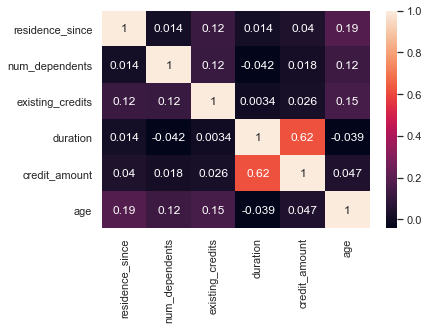

In [24]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

Время выплаты кредита зависит от его размера.
Корреляция, близкая к нулю означает отсутствие зависимости, отрицательная - обратную зависимость.
Возраст и продолжительность выплаты кредита практически не зависят друг от друга (корреляция близка к нулю)
Продолжительность выплаты запрашиваемого кретида не зависит от количества кредитов.

10. Какой признак(и) имеет смысл стандартизировать? Почему?

Можно стандартизировать столбец checking_status. Это будет удобно для анализа. Например: -1 - в долгах, 0 - не зарабатывает, 1 - (0;200т.р.], 2 - более 200 т.р. Аналогично со столбцом employment.


11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

1. Кол-во детей. Для того, чтобы следить, есть ли у этого человека льготы как многодетному родителю, на скольких детей платит ли алименты
2. Кредитный отпуск: да/нет
   Профессия (как посылка к кредитному отпуску)
3. Задержки по погашениям кредитов (если таковые имеются)
4. Наличие ипотеки